# Overview

In [1]:
import pandas as pd

In [68]:
df = pd.read_csv("data/wowah_data.csv.zip", compression='zip', date_parser="timestamp")

In [69]:
df.shape

(10826734, 7)

In [72]:
df.columns
# char: a player id
# level: (1-80)
# race: (Orc, Tauren, Troll, Undead, Blood Elf)
# charclass: 职业(Rogue, Mage, Paladin, Warlock, Hunter, Priest, Warrior, Shaman, Druid, Death Knight)
# zone: 地点
# guild: 公会set to -1 when the player has no guild. 
# timestamp: 数据计入时间

Index(['char', ' level', ' race', ' charclass', ' zone', ' guild',
       ' timestamp'],
      dtype='object')

In [73]:
df.head()

,char,level,race,charclass,zone,guild,timestamp
0,59425,1,Orc,Rogue,Orgrimmar,165,01/01/08 00:02:04
1,65494,9,Orc,Hunter,Durotar,-1,01/01/08 00:02:04
2,65325,14,Orc,Warrior,Ghostlands,-1,01/01/08 00:02:04
3,65490,18,Orc,Hunter,Ghostlands,-1,01/01/08 00:02:04
4,2288,60,Orc,Hunter,Hellfire Peninsula,-1,01/01/08 00:02:09


# Counting

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
df.columns = ["id", "level", "race", "job", "zone", "guild", "time"]
df.columns

Index(['id', 'level', 'race', 'job', 'zone', 'guild', 'time'], dtype='object')

In [76]:
df.race.value_counts()

Blood Elf    3929995
Undead       2530156
Tauren       2331118
Troll        1102409
Orc           933056
Name: race, dtype: int64

In [77]:
df.job.value_counts()

Hunter          1549924
Mage            1437914
Warlock         1347409
Warrior         1282538
Paladin         1158652
Priest          1127051
Rogue           1050134
Druid            916344
Shaman           726679
Death Knight     230089
Name: job, dtype: int64

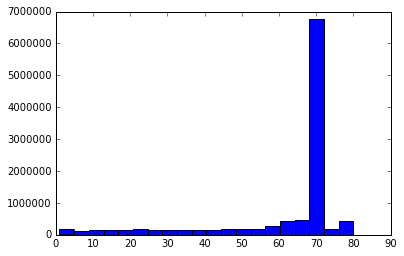

In [78]:
plt.hist('level', data=df, bins=20)
plt.show()

# Heatmap

In [79]:
import plotly.plotly as py
import plotly.graph_objs as go

In [80]:
table = pd.crosstab(df.race, df.job, margins=True)
table

job,Death Knight,Druid,Hunter,Mage,Paladin,Priest,Rogue,Shaman,Warlock,Warrior,All
race,,,,,,,,,,,
Blood Elf,130882,0,532187,637600,1158652,473776,360717,0,636181,0,3929995
Orc,26877,0,387973,0,0,0,57279,122260,67209,271458,933056
Tauren,37339,916344,232772,0,0,0,0,474157,0,670506,2331118
Troll,7286,0,396992,169775,0,142703,195615,130262,0,59776,1102409
Undead,27705,0,0,630539,0,510572,436523,0,644019,280798,2530156
All,230089,916344,1549924,1437914,1158652,1127051,1050134,726679,1347409,1282538,10826734


In [81]:
table.index

Index(['Blood Elf', 'Orc', 'Tauren', 'Troll', 'Undead', 'All'], dtype='object', name='race')

In [82]:
table.columns

Index(['Death Knight', 'Druid', 'Hunter', 'Mage', 'Paladin', 'Priest', 'Rogue',
       'Shaman', 'Warlock', 'Warrior', 'All'],
      dtype='object', name='job')

In [83]:
def glist(tb, n):
    return tb.iloc[n, :-1].tolist()

In [84]:
data = [
    go.Heatmap(
        z=[glist(table,0), glist(table,1), glist(table,2), glist(table,3), glist(table,4)],
        x=['Death Knight', 'Druid', 'Hunter', 'Mage', 'Paladin', 'Priest', 'Rogue',
       'Shaman', 'Warlock', 'Warrior', 'All'],
        y=['Blood Elf', 'Orc', 'Tauren', 'Troll', 'Undead'],
        colorscale = 'Viridis'
    )
]
py.iplot(data, filename='basic-heatmap')

# Data Record Over Time

In [100]:
df.time.dtype

dtype('O')

In [154]:
time_sample = pd.to_datetime(df.time[:50000])
time_sample = time_sample.dt.hour
time_sample = time_sample[time_sample!=23]

In [155]:
time_count = time_sample.value_counts()

In [156]:
time_count = time_count.sort_index()

In [157]:
data = [go.Scatter(x=time_count.index.tolist(),y=time_count.tolist())]
py.iplot(data)